<b>
<p>
<center>
<font size="5">
DATS6202 FINAL PROJECT
</font>
</center>
</p>

<p>
<center>
<font size="4">
Heart Disease Prediction
</font>
</center>
</p>
    
<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

---
## **Introduction**
Cardiovascular diseases are one of the leading causes of mortality globally, prompting the medical industry to continually seek improvements in early diagnosis and treatment strategies. Leveraging the advancements in data analytics and machine learning, our final project for DATS6202 focuses on developing a predictive model for heart disease. By applying sophisticated data preprocessing and exploratory data analysis (EDA) methods, we aim to unravel the intricate patterns within clinical features that contribute to cardiovascular conditions.

---

Link to PPT, Recording, Data: https://drive.google.com/drive/folders/1z2D4Ve_pj5sJtUadIlpWmk3kdIZSediy?usp=sharing

## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')
abspath_curr = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/MyProject'


Mounted at /content/drive


##WARNING

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

##MATPLOTLIB

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

##TENSORFLOW

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


##RANDOM SEED

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

---
# 1. **Exploratory Data Analysis** <a class="anchor" id="1"></a>
---

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/MyProject/heart.csv")
print('Shape of the data is ', data.shape)

Shape of the data is  (303, 14)


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

We can see from the dtypes that all of our variables are numerical and even the categorical variables have been label encoded.

---
## 1.1 **Data Dictionary** <a class="anchor" id="1.1"></a>

1. age: age in years
2. sex: sex
    * 1 = male
    * 0 = female
3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
    * 1 = true;
    * 0 = false
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
    * 1 = yes
    * 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
    * 0 = `error (in the original dataset 0 maps to NaN's)`
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversable defect
14. target (the lable):
    * 0 = no disease,
    * 1 = disease

---



##**Data pre-processing** <a class="anchor" id="1.2"></a>
### Drop faulty data
Drop the missing, NAN and wrong data values from the data

In [ ]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 296 instead of 303!


### Rename columns
To enhance the accessibility and interpretability of our dataset, which initially features cryptically abbreviated attribute names, we've undertaken a comprehensive renaming process. Our goal is to replace the esoteric medical abbreviations with their full clinical designations, as detailed in the UCL data repository. This not only aids in clarity for those well-versed in medical terminology but also makes the data more approachable for individuals without a healthcare background.

In parallel, we're decoding the numerical category labels that represent various medical conditions into their explicit descriptions. For instance, numerical codes for different types of angina will be translated into their respective clinical terms, such as 'atypical angina' and 'typical angina'. This step ensures that the data speaks a clear language, facilitating a more intuitive analysis.


In [ ]:
data = data.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [ ]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [ ]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


### Grouping Features (by data type)
* As we have seen above there are three datatypes i.e **object**, **int** and **floats**. Let's group them according to type.


In [ ]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

## **Exploring Features/Target** <a class="anchor" id="1.3"></a>

This segment of our analysis is devoted to an exhaustive examination of all attributes within our dataset, inclusive of the outcome variable. Our approach is to first offer a statistical summary, where applicable, to grasp the central tendencies and dispersion of the data. Additionally, we will assess the distributions of these attributes to gain insights into their respective behaviors and patterns.

### Target distribution

A critical aspect of predictive modeling is ensuring the balance of classes in the target variable. Assessment of the below plot reveals a relatively balanced distribution between instances of heart disease and those without. Specifically, the data indicates that approximately 46% of cases are heart disease-free, while around 54% are instances of heart disease. This parity alleviates concerns regarding imbalance in the target variable, which could otherwise lead to biases in our predictive model. Such balance in the dataset provides a more equitable foundation for our subsequent modeling efforts, ensuring that our predictions are not skewed toward one outcome over the other.

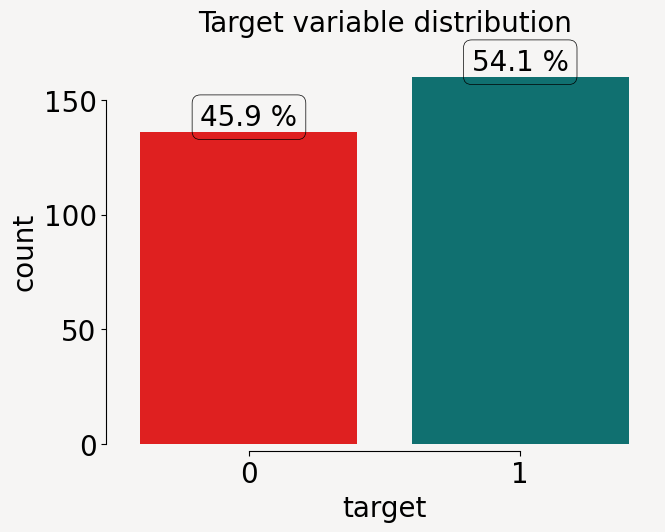

In [ ]:
mypal = ['#0000FF', '#FF0000', '#FFFF00', '#228B22', '#800080', '#008080']
plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

### Numerical Features

#### Statistical summary

For the numerical features we can apply the data.describe() function

In [ ]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


<blockquote style="border-left: 4px solid #ccc; margin: 1.5em 10px; padding: 0.5em 10px;">

<h3>Observations from the Statistical Summary of the Dataset:</h3>

<p><strong>Age:</strong> The age variable shows a mean age of approximately 54.5 years with a standard deviation of around 9 years. This indicates a middle-aged cohort with moderate age variation, ranging from 29 to 77 years. The middle 50% of the participants are between 48 and 61 years old, which suggests the dataset might be particularly informative for conditions prevalent in this age range.</p>

<p><strong>Cholesterol:</strong> The cholesterol levels have a mean value of about 247 mg/dL, which is considered high relative to standard health guidelines that suggest a desired level below 200 mg/dL for adults. The wide range, from 126 to 564 mg/dL, with a standard deviation of nearly 52 mg/dL, indicates significant variability in cholesterol levels among the participants, which can be a pivotal factor in heart disease.</p>

<p><strong>Resting Blood Pressure:</strong> The resting blood pressure has a mean of roughly 131 mm Hg, with a standard deviation of 17.7 mm Hg. The values span from a low of 94 mm Hg to a high of 200 mm Hg. A median of 130 mm Hg aligns closely with the mean, pointing towards a symmetric distribution of blood pressure readings across the dataset.</p>

<p><strong>Max Heart Rate Achieved:</strong> The max heart rate achieved presents a mean of approximately 149.6 beats per minute, with individuals reaching as high as 202 beats per minute and as low as 71. The interquartile range from 133 to 166 indicates that the majority of individuals have a maximum heart rate within what would be considered a normal response to exercise.</p>

<p><strong>ST Depression:</strong> The ST depression noted during stress tests averages at about 1.06, with a relatively wide spread, as indicated by the standard deviation. The maximum recorded value is 6.2, which is significantly higher than the upper quartile value of 1.65, suggesting the presence of outliers or extreme cases which could be clinically significant.</p>

<p><strong>Number of Major Vessels:</strong> For the num_major_vessels feature, the data shows that on average, subjects have less than one major vessel noted on fluoroscopy. However, the maximum number goes up to 3, and the standard deviation suggests variability, with the bulk of individuals having none visible.</p>

<p>The data reflects a typical profile seen in patients at risk for or living with heart disease, with several of these factors—age, cholesterol, blood pressure, and heart rate during stress—being critical components in the evaluation of cardiovascular health. The provided statistics will be instrumental in understanding the correlation between these variables and the presence of heart disease in the subsequent analytical steps.</p>

</blockquote>


#### Distribution: Density plots

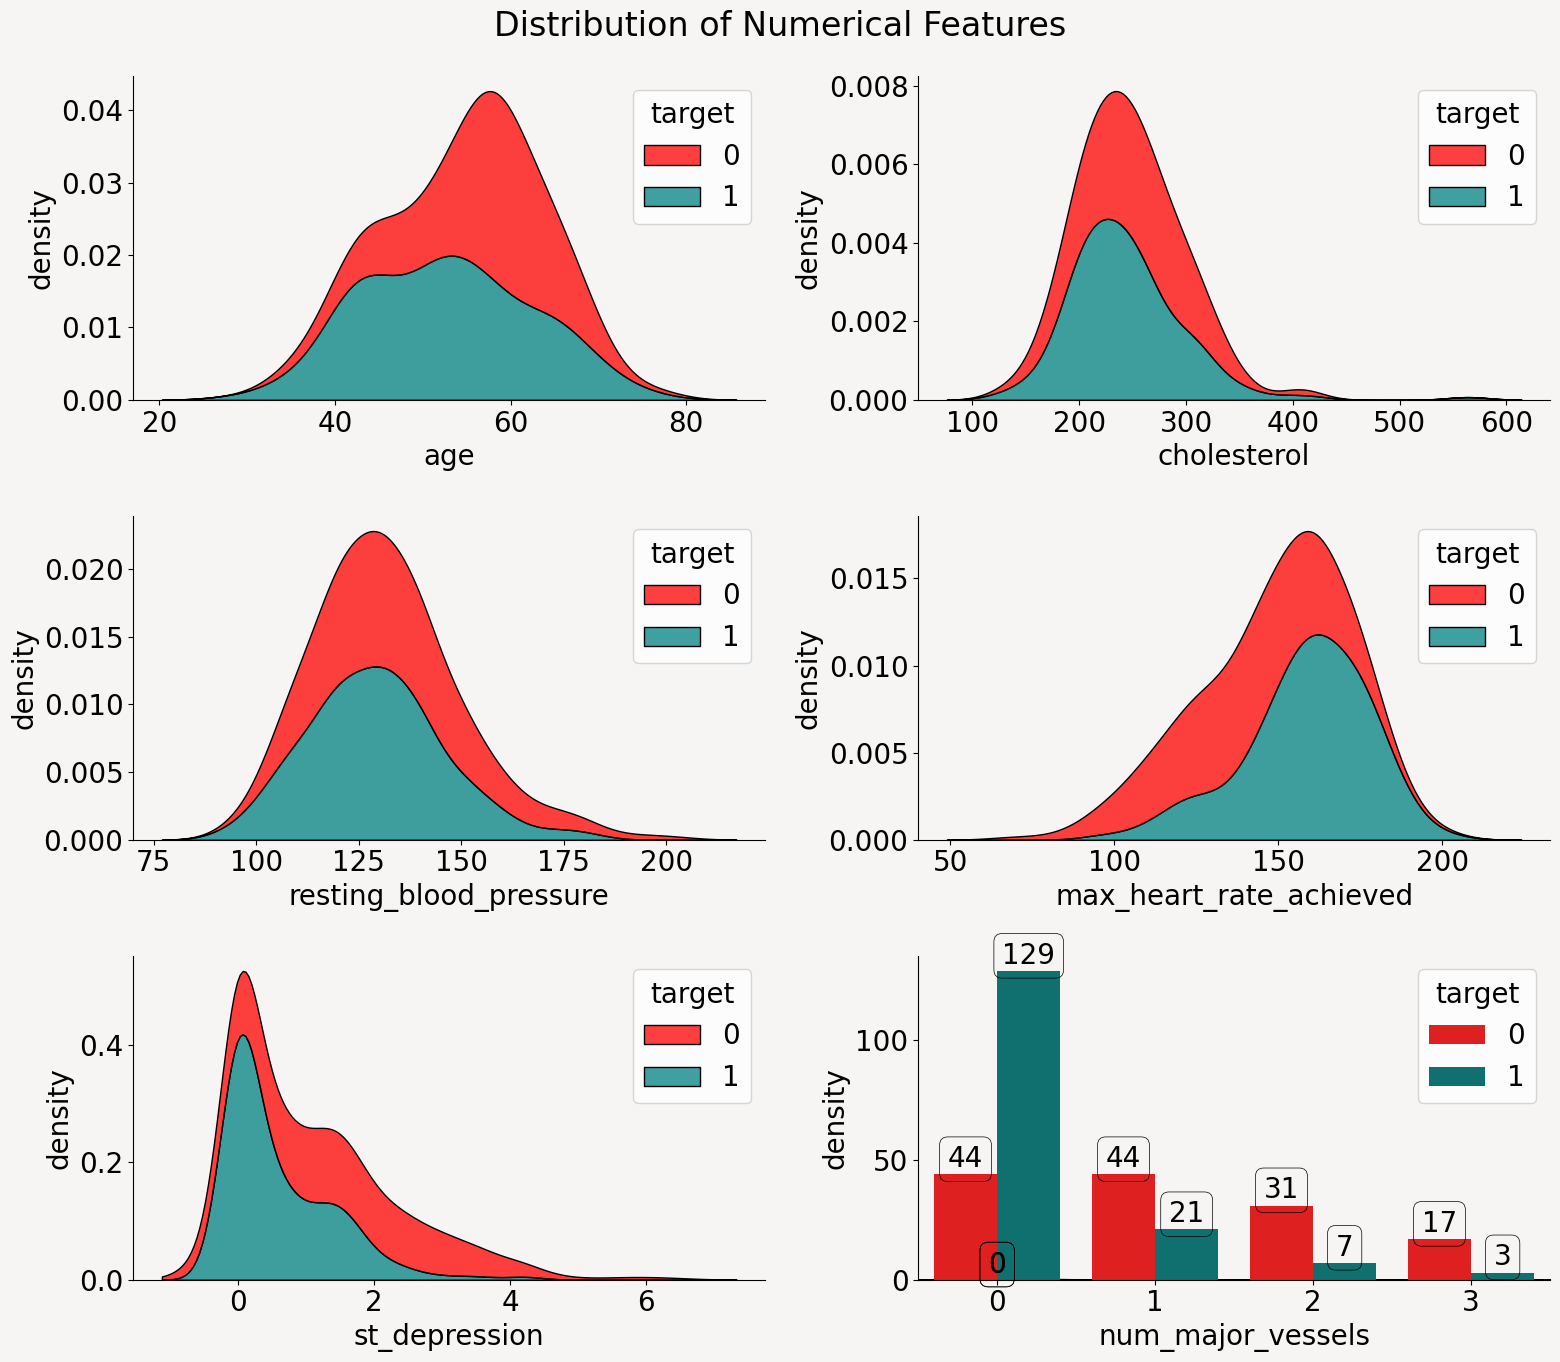

In [ ]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')

    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4])
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24)
plt.tight_layout()
plt.show();

<blockquote style="border-left: 4px solid #ccc; margin: 1.5em 10px; padding: 0.5em 10px;">

<h3>Observations from the Distribution of Numerical Features:</h3>

<p><strong>Age:</strong> The distributions peak in the mid-50s for both groups. There is a noticeable skew in the group with heart disease towards older ages, suggesting a higher prevalence of heart disease among older individuals in the dataset.</p>

<p><strong>Cholesterol:</strong> Individuals with heart disease tend to have higher cholesterol levels, as shown by the density distribution. This indicates a potential link between higher cholesterol and the occurrence of heart disease.</p>

<p><strong>Resting Blood Pressure:</strong> Similar distributions for resting blood pressure are observed in both groups, with a peak around 120-140 mm Hg. The overlapping distributions suggest resting blood pressure alone may not be a definitive indicator of heart disease.</p>

<p><strong>Max Heart Rate Achieved:</strong> Those without heart disease typically achieve higher max heart rates, as the distribution is skewed to the right. Conversely, the group with heart disease has a distribution skewed to the left, suggesting a lower max heart rate could be associated with heart disease.</p>

<p><strong>ST Depression:</strong> A stark difference in ST depression values between the two groups is evident. Higher densities of ST depression in the heart disease group, especially within the 1 to 3 range, suggest it could be a significant marker of heart disease.</p>

<p><strong>Number of Major Vessels (num_major_vessels):</strong> Most individuals without heart disease have zero major vessels noted. In contrast, the presence of one or more major vessels is more common in those with heart disease, indicating a potential relationship between the number of vessels and the likelihood of having heart disease.</p>

</blockquote>


#### Selected Features


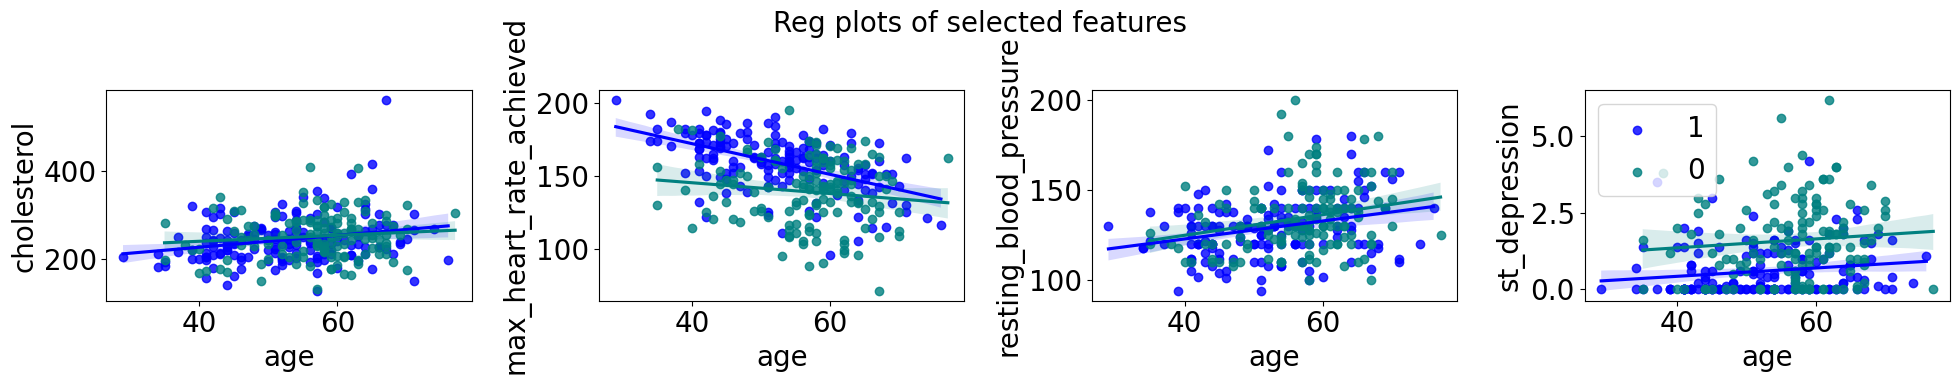

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend()
plt.tight_layout()
plt.show();

<blockquote style="border-left: 4px solid #ccc; margin: 1.5em 10px; padding: 0.5em 10px;">

<h3>Regression Plot Observations:</h3>

<p><strong>Cholesterol vs. Age:</strong> The scatter plot shows a slight upward trend, indicating that cholesterol levels may increase with age. The concentration of points and the regression line suggest a weak positive correlation. This could mean that as age increases, there is a tendency, although not very strong, for cholesterol levels to rise.</p>

<p><strong>Max Heart Rate Achieved vs. Age:</strong> There is a noticeable downward trend in this plot. As age increases, the maximum heart rate achieved tends to decrease. The spread of the data points around the regression line indicates a moderate negative correlation, suggesting that older individuals may have lower peak heart rates during exercise.</p>

<p><strong>Resting Blood Pressure vs. Age:</strong> The regression line here also indicates a slight upward trend, suggesting that resting blood pressure may increase with age. The data points are widely dispersed around the regression line, which may imply a weak correlation.</p>

<p><strong>ST Depression vs. Age:</strong> This plot shows a more horizontal trend line, suggesting that there might be little to no correlation between ST depression and age. However, the wide spread of data points, especially among older individuals, could indicate variability in how ST depression is expressed across different ages.</p>

</blockquote>



### Categorical Features

                                                                                                                                    
We use a count plot to visualize the different categories with respect to the target variable. Two things we could take note of are the distribution of each category in the dataset and their contribution to the probability of correct prediction of the target variable, i.e has disease (=1) or has no disease (=0). Below is the summary of the categorical features.

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color: #4e4e4e; padding: 1em; margin:24px;">
   
<ul>
<li> <font color="white" size=+1.0><b>Chest Pain:</b></font>
    <ul>
        <li> More than 75% of the patients experience either <strong><em>typical angina</em></strong> or <strong><em>non-angina</em></strong> chest pain.
        <li> Patients who experienced <em>atypical angina</em> or <strong>non-angina</strong> chest pain are more likely to have a heart disease.
    </ul>  
    
<li> <font color="white" size=+1.0><b>Resting Electrocardiogram:</b></font>
    <ul>
        <li> Patients with <strong>Left ventricular hypertrophy</strong> are the fewest (~1.4%). The rest is almost a 50-50 split between patients with <strong>ST-T abnormality</strong> and those with normal REC tests.
        <li> <strong>ST-T abnormality</strong>  seem to have a better correlation with the target, i.e the majority of patients with this kind of REC test ended up with a heart disease.
</ul>    
<li> <font color="white" size=+1.0><b>ST-Slope:</b></font>
    <ul>
    <li> Most patients have a <strong>downsloping</strong> or <strong>flat</strong> ST-Slope of their REC test.
    <li> <strong>downsloping</strong> ST-Slopes are a strong indication that a patient might have a heart disease.
</ul>   
    
<li> <font color="white" size=+1.0><b>Thalassemia:</b></font>
    <ul>
    <li> Most patients have a <strong>normal</strong> or <strong>reversable defect</strong>
    <li> Patients who have thalassemia defects (reversable + fixed) are less likely to have a heart disease. Whereas, those with normal thalassemia are more likely to have a heart condition. Sounds not intuitive.
</ul>   
    
<li> <font color="white" size=+1.0><b>Fasting blood sugar</b></font>
    <ul>
    <li> Patients with lower (less than 120mg/ml) <strong>fasting blood sugar</strong> are the majority in our dataset consisting of ~85% of the sample.
    <li> Having lower resting blood sugar tends to increase the chances (~54%) of a heart disease.
</ul>   
    
<li> <font color="white" size=+1.0><b>Exercise Induced Angina</b></font>
    <ul>
    <li> Two-third of the patients showed no exercise induced angina.
    <li> 76% of the patients with exercise induced angina had no heart conditions. Whereas ~69% of the patients who did not experience exercise induced angina were diagnosed with heart condition.
</ul>
    
<li> <font color="white" size=+1.0><b>Sex</b></font>
    <ul>
    <li> More patients in the sample data are male.
    <li> Females seem to suffer from heart condition more than males.
</ul>   
    
</ul>                                                                                                                                             
</blockquote>




<!-- def cat_freq_counter(df, columns):
    dataFrames_ = []
    for col in columns:
        dataFrames_.append(pd.DataFrame(df[col].value_counts()).style.background_gradient(cmap='cool'))
    return HTML(f"<table><tr> {''.join(['<td>' + dfs._repr_html_() + '</td>' for dfs in dataFrames_])} </tr></table>")

# split the width of the output
display(cat_freq_counter(data, cat_feats[0:4]))
display(cat_freq_counter(data, cat_feats[4:])) -->

#### Distribution: Count plots

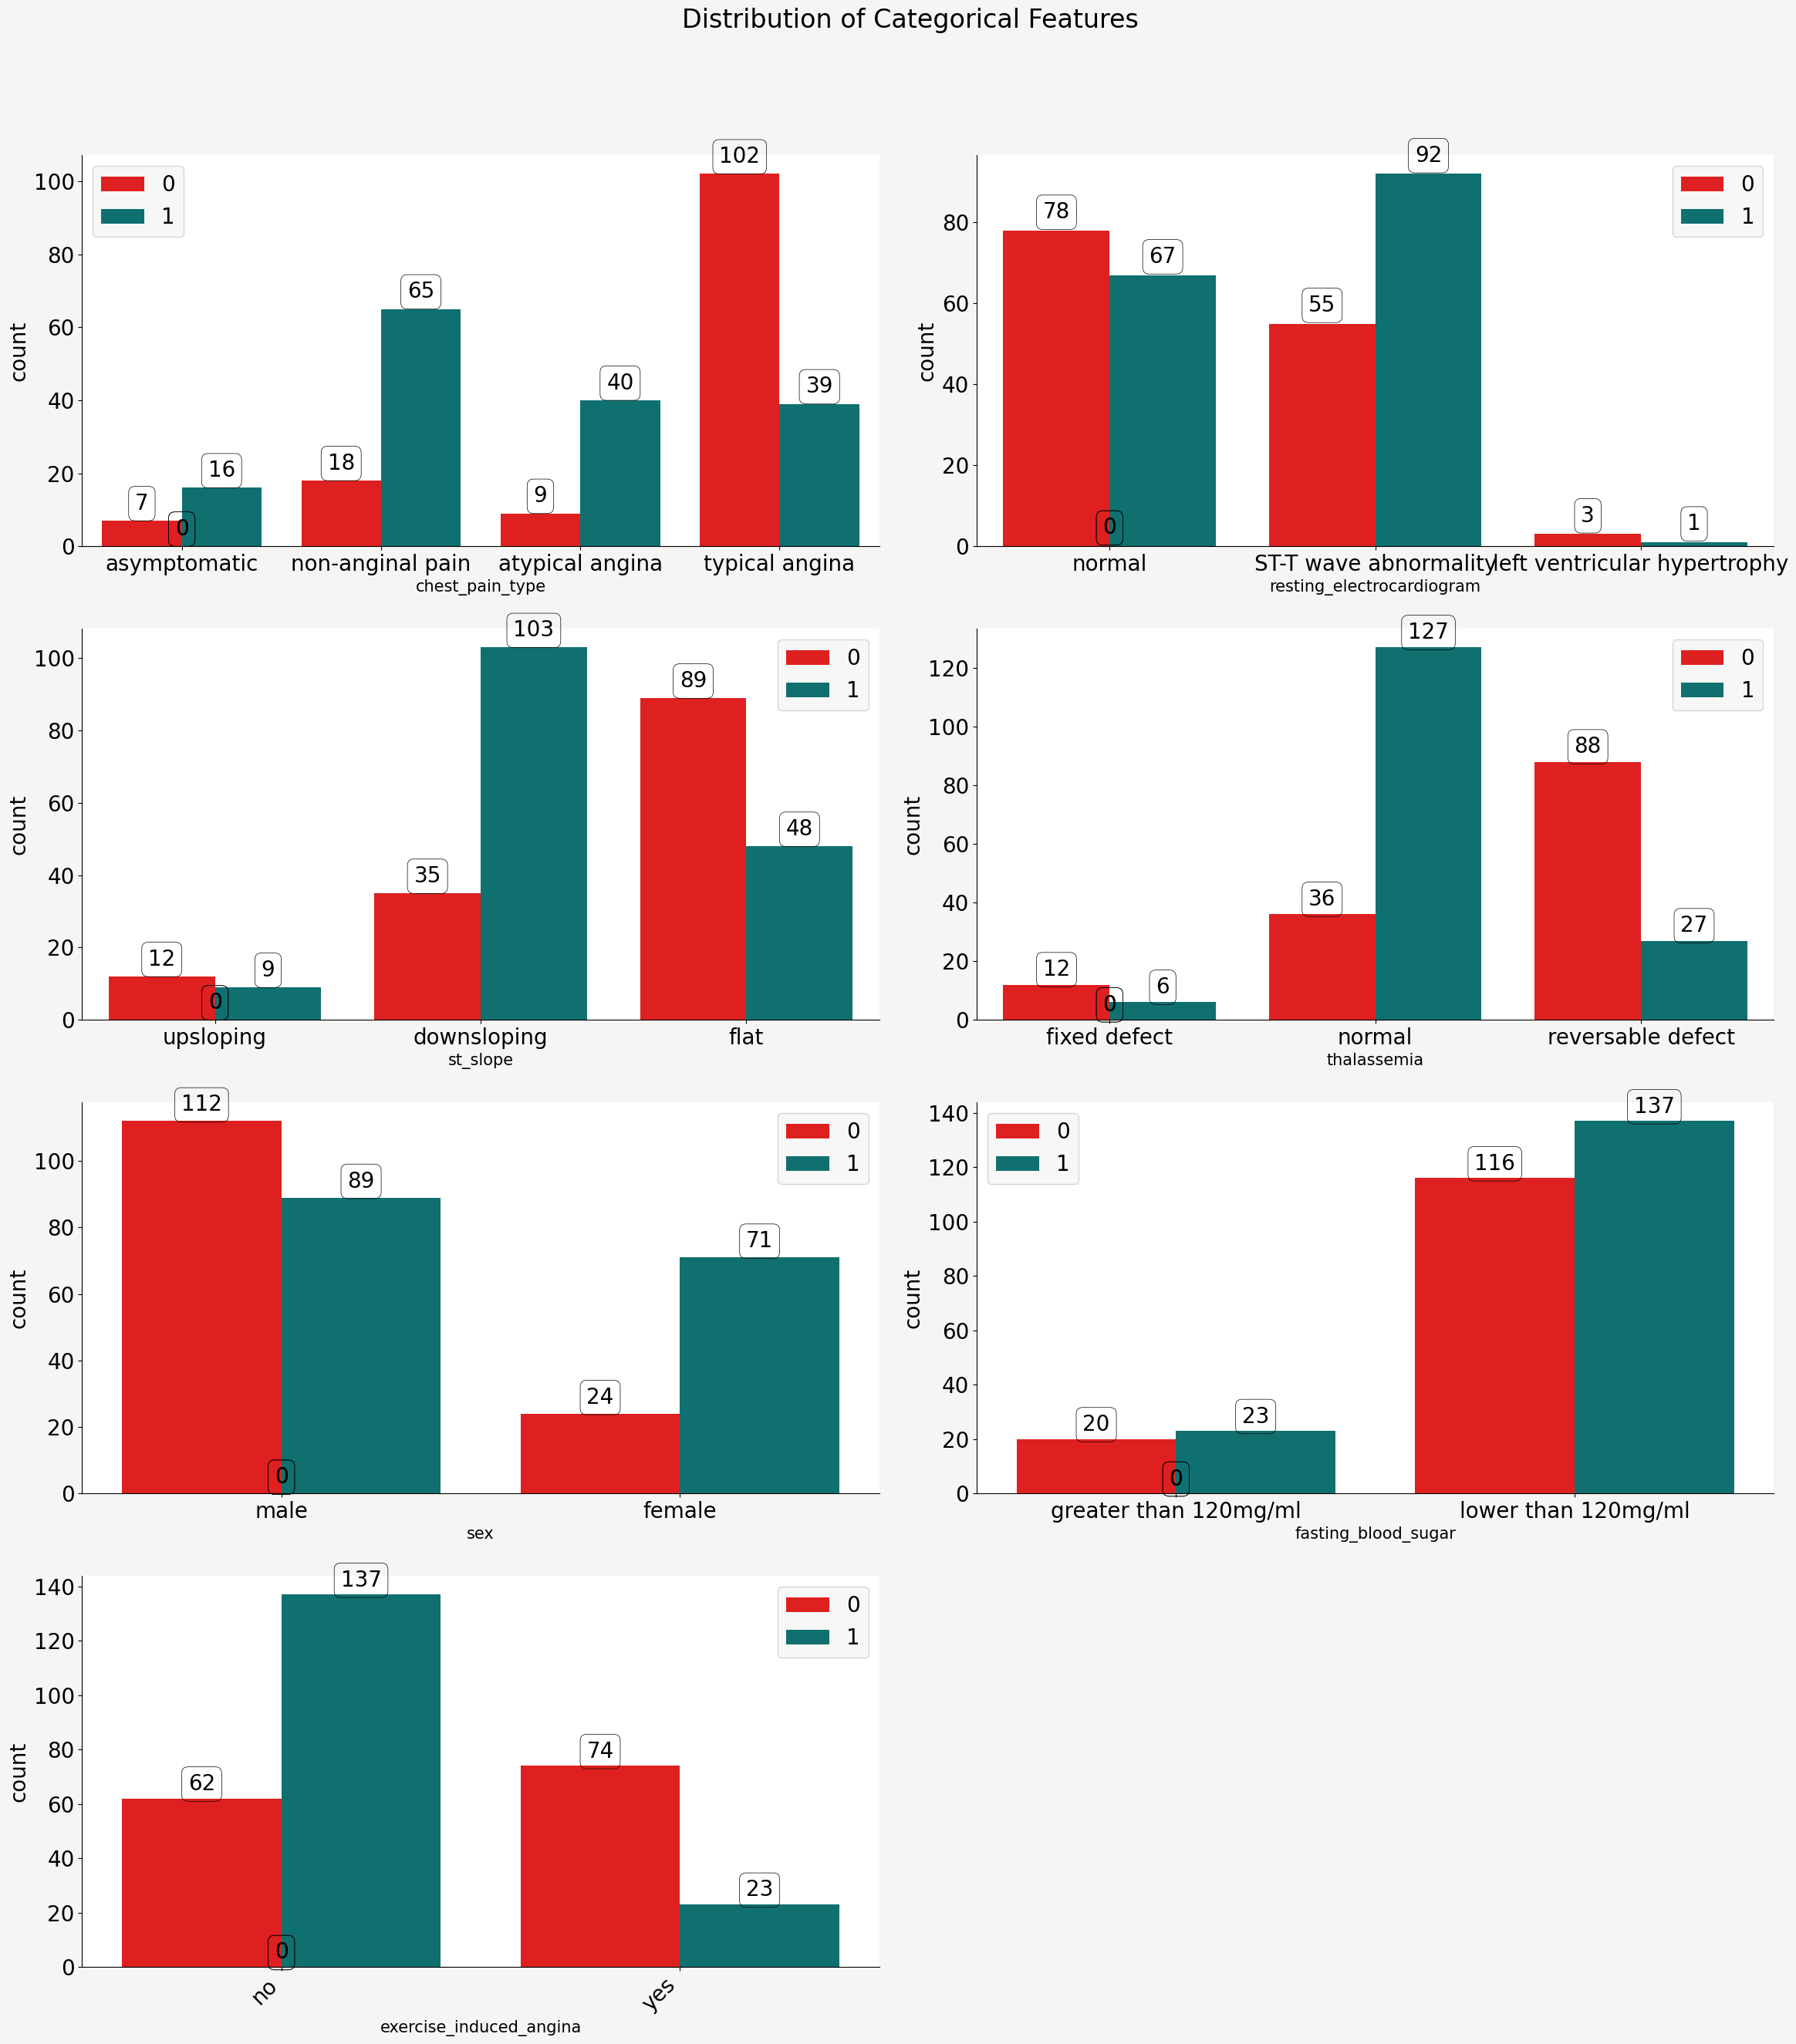

In [ ]:
mypal = ['#0000FF', '#FF0000', '#FFFF00', '#228B22', '#800080', '#008080']

def count_plot(data, cat_feats, mypal):
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last = (nrow * ncol) - L

    fig, axs = plt.subplots(nrow, ncol, figsize=(24, 28), facecolor='#F6F5F4')
    fig.subplots_adjust(top=0.92, hspace=0.3) # Adjust horizontal space if needed
    axs = axs.flatten() # Flatten the array for easier iteration
    for ax in axs[-remove_last:]:
        ax.set_visible(False)

    for i, col in enumerate(cat_feats):
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4], ax=axs[i])
        ax.set_xlabel(col, fontsize=15)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        ax.legend(facecolor='#F6F5F4')

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format((height)), ha="center",
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

        # Rotate x-axis labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') # Rotate labels to 45 degrees

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the rect to fit the subplot titles and suptitle
    plt.show()
    return 0


count_plot(data, cat_feats[0:-1],mypal);

## **Correlation Heatmaps** <a class="anchor" id="1.4"></a>

Heatmaps serve as a powerful visual aid, articulating the degree to which variables in a dataset share a relationship. The correlation heatmap, in particular, showcases the extent of association or dependency between pairs of features, encapsulating the strength and direction of their relationship. To ensure analytical precision, the selection of an appropriate correlation coefficient is imperative, contingent upon the nature of the data. Renowned methodologies include Pearson's correlation coefficient for linear relationships, point biserial correlation for dichotomous and continuous data interrelations, and Cramer's V for categorical data analysis, among others.

### Pearson's correlation

* Pearson's correlation coefficient is a statistic that measures the degree of linear relationship between two variables, presenting a normalized value that ranges between -1 and 1. This coefficient is derived from the covariance of the two variables, standardized by the product of their standard deviations. This normalization allows for a uniform interpretation of correlation strength, where a coefficient close to 1 signifies a strong positive correlation, -1 indicates a strong negative correlation, and a value near 0 implies no linear correlation. This measure is a foundational tool in the exploration of data interdependencies.

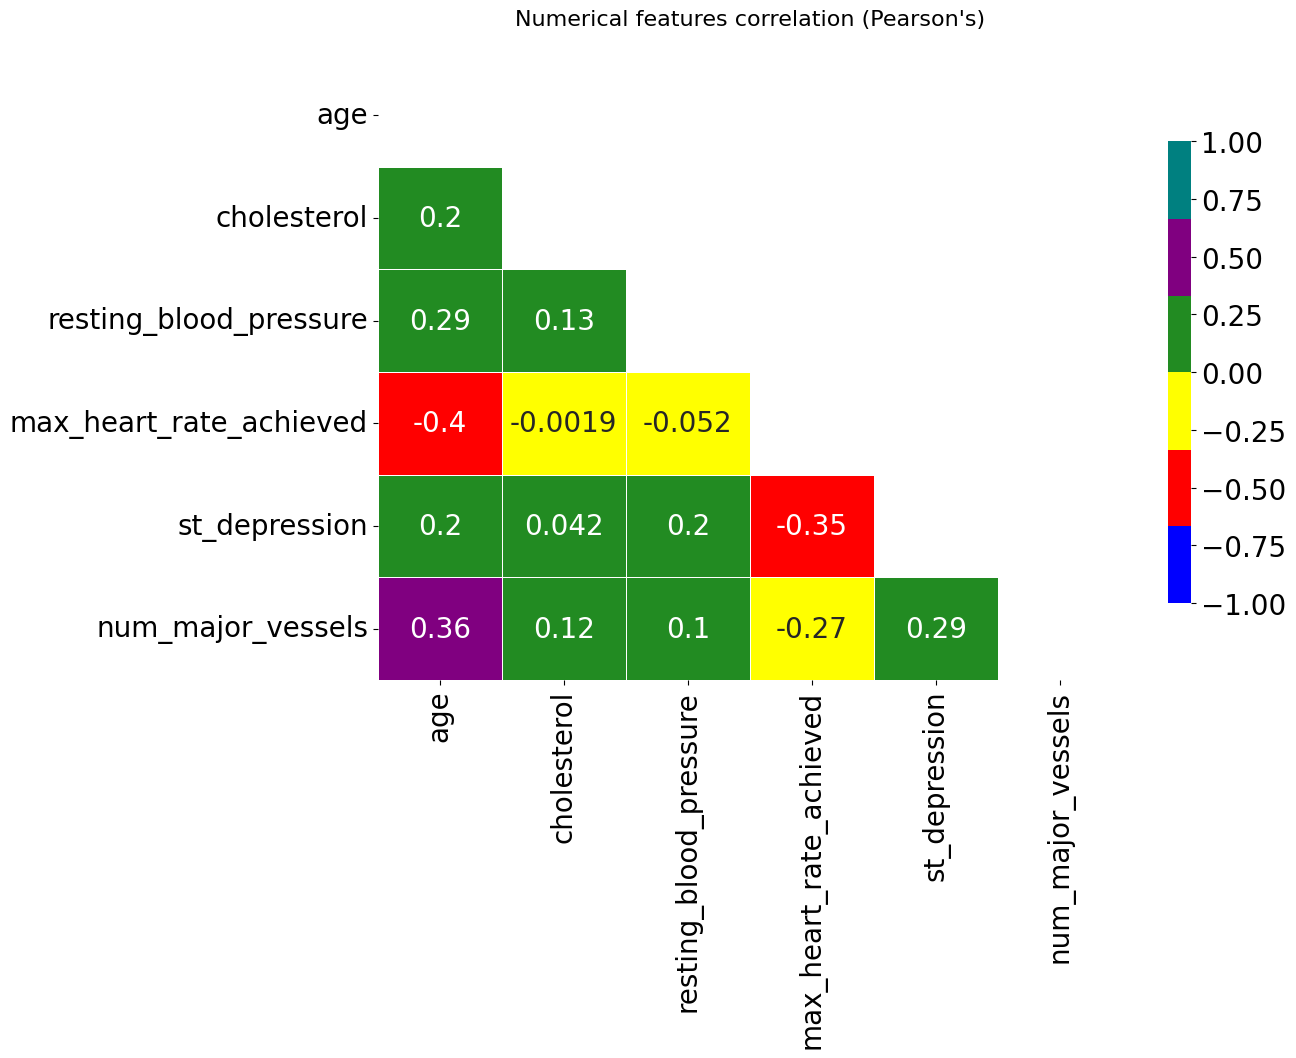

In [ ]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 8), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=16, y= 1.05);

<blockquote style="border-left: 4px solid #ccc; margin: 1.5em 10px; padding: 0.5em 10px;">
  <h3>Insights from the Pearson Correlation Coefficients Heatmap:</h3>
  <ul>
    <li><strong>Age and Max Heart Rate Achieved:</strong> There is a moderately negative correlation of -0.4, suggesting a tendency for the maximum heart rate achieved to decrease as age increases.</li>
    <li><strong>Age and Number of Major Vessels:</strong> The data indicates a moderate positive correlation of 0.36, implying an increase in the number of major vessels with age.</li>
    <li><strong>ST Depression and Max Heart Rate Achieved:</strong> A negative correlation of -0.35 is observed, indicating that an increase in ST depression may be associated with a decrease in the maximum heart rate achieved.</li>
    <li><strong>Resting Blood Pressure and Age:</strong> A mild positive correlation of 0.29 suggests that resting blood pressure may slightly rise with age.</li>
    <li><strong>Cholesterol and Age:</strong> There is a weak positive correlation of 0.2, indicating a slight potential for cholesterol levels to increase with age.</li>
    <li><strong>Other Correlations:</strong> The remaining correlations are weak, with values close to zero, signifying no strong linear relationship between those pairs of variables.</li>
  </ul>
</blockquote>


<section>
  <h2 id="1.5">Summary of Exploratory Data Analysis (EDA)</h2>
  <ul>
    <li><strong>Dataset Composition:</strong> Commenced with 303 entries spanning 14 attributes (13 independent variables and one target variable), refined to 296 after data cleansing.</li>
    <li><strong>Completeness:</strong> No missing values present, indicating a dataset ready for in-depth analysis.</li>
    <li><strong>Data Types:</strong>
      <ul>
        <li>Six variables are numerical.</li>
        <li>Seven variables are categorical, offering a rich tapestry of data for examination.</li>
      </ul>
    </li>
    <li><strong>Target Variable Distribution:</strong> The dichotomy of the target is well-proportioned, with 54% representing no disease, and 46% indicating presence, which suggests a balanced dataset.</li>
    <li><strong>Inter-Feature Correlations:</strong>
      <ul>
        <li>Overall weak correlations amongst features.</li>
        <li>Numerical features such as <code>num_major_vessels</code>, <code>max_heart_rate_achieved</code>, and <code>st_depression</code> exhibit moderate correlations with the target variable.</li>
        <li>Categorical features including <code>chest_pain_type</code>, <code>num_major_vessels</code>, <code>thalassemia</code>, and <code>exercise_induced_angina</code> show stronger predictive relationships with the target, particularly <code>thalassemia</code> at a 0.52 correlation coefficient.</li>
        <li>Cholesterol's correlation with heart disease is surprisingly low.</li>
      </ul>
    </li>
  </ul>
  <p><strong>Key Insights:</strong> Variables such as <code>chest_pain_type</code>, <code>num_major_vessels</code>, <code>thalassemia</code>, <code>exercise_induced_angina</code>, <code>max_heart_rate_achieved</code>, and <code>st_depression</code> stand out as potentially significant predictors. Future modeling efforts will seek to validate their predictive prowess.</p>
</section>


---
# 2. **Modeling** <a class="anchor" id="2"></a>
---

##**Scikit Learn Classifiers** <a class="anchor" id="2.1"></a>

This is a binary classification problem (has-disease or no-disease cases). Scikit learn offers a wide range of classification algorithms and is often the starting point in most/traditional machine learning challenges, so we start by exploring few of the classification alorithms from the sklearn libarary such as `Logistic Regression`, `Nearest Neighbors`, `Support Vectors`, `Nu SVC`, `Decision Tree`, `Random Forest`, `AdaBoost`, `Gradient Boosting`, `Naive Bayes`, `Linear Discriminant Analysis`, `Quadratic Discriminant Analysis` and `Neural Net`.

In the initial phase, we turned to a suite of classic Scikit-learn models such as Logistic Regression, Neural Networks, Decision Tree, Random Forest, and others. Each model was first executed using default parameters to establish a baseline. Their performance was gauged across multiple metrics, including accuracy, precision, recall, and F1 scores.

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.6 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
import shap

In [ ]:
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''

    label_encoder = LabelEncoder()
    data_encoded = data.copy()

    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])

    data = data_encoded

    return data

def score_summary(names, classifiers):
    cols = ["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)
        pred_proba = clf.predict_proba(X_val)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        recall = recall_score(y_val, pred)
        precision = precision_score(y_val, pred)
        f1 = f1_score(y_val, pred)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)

    return np.round(data_table, 2)



def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        cm = confusion_matrix(y_val, pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=ax)
        ax.title.set_text(names[i])
        i += 1
    plt.tight_layout()
    plt.show()


def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves

    '''
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")


In [ ]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]


###Performance metric

There are several metrics that can be used to gauge the performance of a given classification algorithm. The choice of the '*appropriate*' metrics is then dependent on the type of problem we are dealing with. There are case where, for example, *accuracy* can be the right choice and in some other case a *recall* or *precision* could be more fitting to the purpose. Since we are dealing with medical case (classify if a case is positive for heart disease or not), we could use recall (true positive rate or sensitivity) as performance metrics to choose our classifier. Note here that we do not want to classify positive (has disease) cases as negative (no disease).

**Confusion matrix** : A confusion matrix (aka an error matrix) is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an *actual* class while each column represents the instances in a *predicted* class [[wiki](https://en.wikipedia.org/wiki/Confusion_matrix)]. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.

<div>    
<img src="https://miro.medium.com/max/875/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg" width="350", align="center"/>  
</div>


---

**Key**:

|**Term** |**Meaning** | **Descriptions**|
| --- |---|---|
|TP |True Positive|Positive cases which are predicted as positive|
|FP |False Positive|Negative cases which are predicted as positive|
|TN |True Negative|Negative cases which are predicted as negative|
|FN |False Negative|Positive casea which are predicted as negative|

---
**Accuracy** : Measures how many of the cases are correctly identified/predicted by the model, i.e correct prediction divided by the total sample size.

$\frac{TP + TN}{TP +TN + FP + FN}$

**Recall**: Measures the rate of *true positives*, i.e how many of the *actual* positive cases are *identified/predicted* as positive by the model.

$\frac{TP}{(TP + FN)}$

**Precision**: Measures how many of the positive predicted cases are actually positive.

$\frac{TP}{(TP + FP)}$

**F1-Score** : Combines the precision and recall of the model and it is defined as the harmonic mean of the model’s precision and recall.

$2\frac{recall * precision}{recall + precision}$

**ROC curves** : A receiver operating characteristic (ROC) curve, is a graphical plot which illustrates the performance of a binary classification algorithm as a function of ture positive rate and false positive rate.



### Performance metrics summary table

In [ ]:
from sklearn.metrics import precision_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, recall_score, accuracy_score,
    roc_curve, auc, precision_score, f1_score, ConfusionMatrixDisplay
)


In [ ]:
score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,86.490000,0.920000,0.910000,0.820000,0.860000
9,Linear DA,85.140000,0.920000,0.890000,0.820000,0.850000
10,Quadratic DA,85.140000,0.900000,0.830000,0.850000,0.840000
5,Random Forest,83.780000,0.920000,0.830000,0.830000,0.830000
4,Decision Tree,82.430000,0.820000,0.830000,0.810000,0.820000
6,AdaBoost,82.430000,0.860000,0.910000,0.760000,0.830000
7,Gradient Boosting,82.430000,0.900000,0.890000,0.780000,0.830000
8,Naive Bayes,82.430000,0.920000,0.860000,0.790000,0.820000
3,Nu SVC,81.080000,0.910000,0.910000,0.740000,0.820000
11,Neural Net,78.380000,0.880000,0.940000,0.700000,0.800000


<section>  
  <h3>Performance Table Summary</h3>
  <p><strong>Logistic Regression</strong> shows the highest F1 score, indicative of a strong balance between precision and recall.</p>
  <p><strong>Discriminant Analysis</strong>: Linear DA is a close second in F1 score, with Quadratic DA also demonstrating effectiveness.</p>
  <p><strong>Random Forest</strong> and <strong>Gradient Boosting</strong> exhibit competitive performance but slightly lag in F1 score.</p>
  <p><strong>Neural Net, Nu SVC</strong>, and <strong>AdaBoost</strong> present decent F1 scores but not top-tier as the others.</p>
  <p><strong>Nearest Neighbors</strong> and <strong>Support Vector Machines</strong> rank lower, particularly Nearest Neighbors with the lowest F1 score.</p>
</section>


##ROC curves

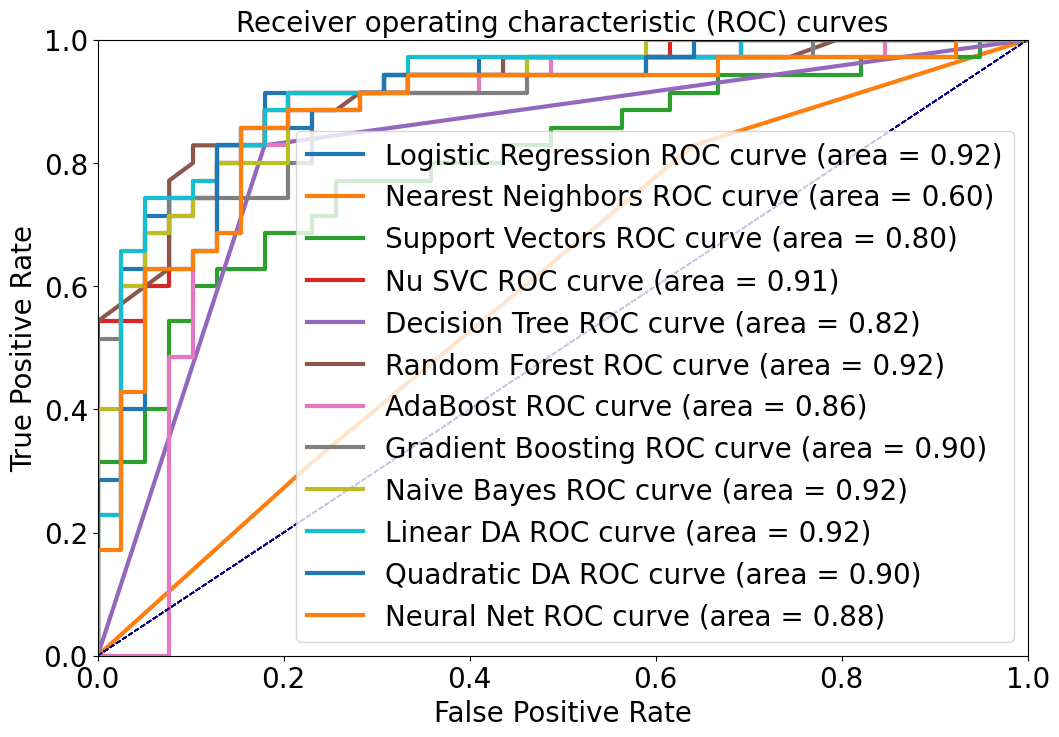

In [ ]:
roc_auc_curve(names, classifiers)

<section>
  <h3>ROC Curve Plot</h3>
  <p>The ROC curve analysis illustrates that Logistic Regression, Random Forest, Naive Bayes, and Linear DA outperform others in distinguishing between the two classes.</p>
  <p><strong>Nearest Neighbors</strong> demonstrates the lowest ROC-AUC, suggesting it might not be the best fit for this classification task.</p>
</section>


### Confusion matrix

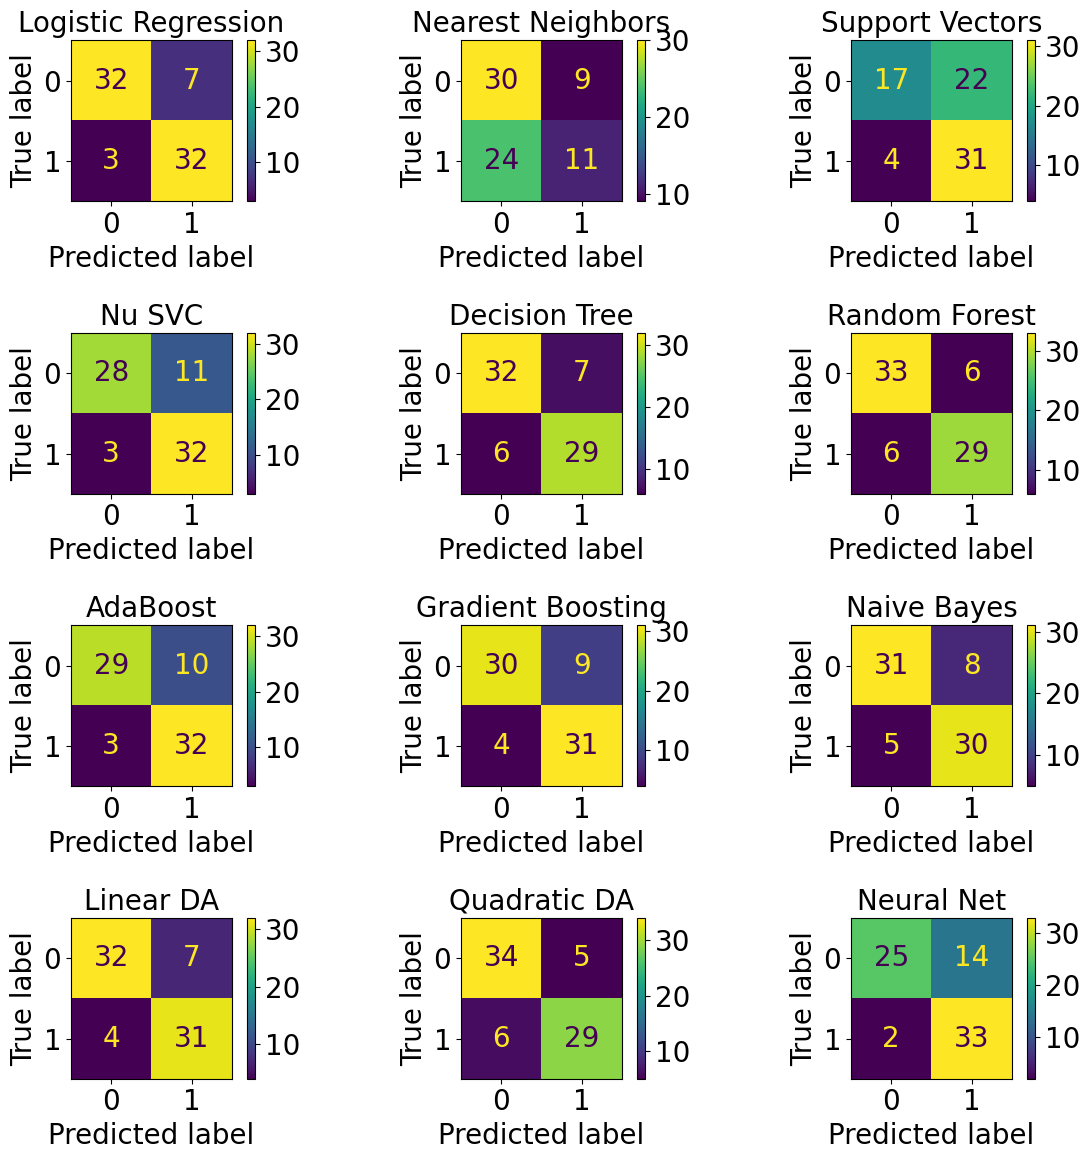

In [ ]:
plot_conf_matrix(names, classifiers, nrows=4, ncols=3, fig_a=12, fig_b=12)

<section>
  <h3>Confusion Matrix Grid</h3>
  <p><strong>Logistic Regression</strong> and <strong>Quadratic DA</strong> record a high count of true positives and negatives, essential for medical diagnosis accuracy.</p>
  <p><strong>Neural Net</strong> reveals a concerningly high number of false negatives, which is problematic in a medical context.</p>
  <p><strong>Nearest Neighbors</strong> and <strong>Support Vectors</strong> show substantial false predictions, indicating less reliability.</p>
  
  <p>In conclusion, Logistic Regression stands out as the most appropriate model for this medical diagnostic task, based on the F1 score and corroborated by other performance metrics.</p>
</section>


### Parameter Tuning (RandomizedSearch): LogisticRegression



Building upon this insight, we refined the Logistic Regression model through hyperparameter tuning. We defined a parameter grid, employing 'liblinear' as the solver with 'l1' and 'l2' penalties, and utilized Random Search Cross-Validation with a 5-fold strategy to ascertain the optimal set. The tuning process pointed us towards a C value of 0.28, with 'l2' penalty and 'liblinear' solver as the most effective combination. Interestingly, when re-applied to the Logistic Regression model, our F1 score held steady, validating the strength of the initial model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr,
                         space,
                         random_state=seed,
                         cv = 5,
                         scoring='f1')

rand_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Hyperparameters: {'C': 0.2835648865872159, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.82      0.91      0.86        35

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.87      0.86      0.86        74



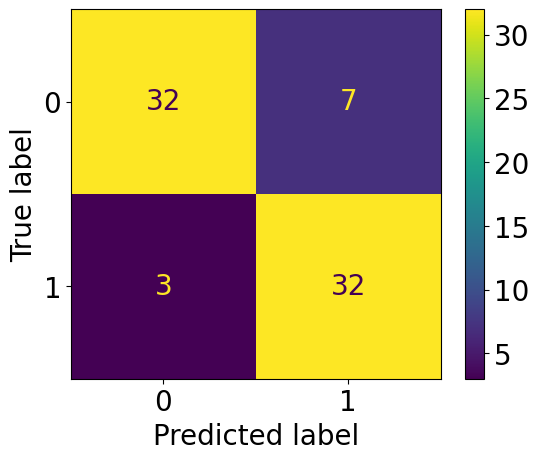

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<section>
  <h2 id="2.2">Enhanced Modeling with LGBM and XGBoost</h2>
  <p>
    Having explored a range of classifiers from the Scikit-learn library, we now turn our attention to the cutting-edge realms of boosted tree algorithms, specifically <a href="https://xgboost.readthedocs.io/en/stable/#" target="_blank"><strong>XGBoost</strong></a> and <a href="https://lightgbm.readthedocs.io/en/latest/index.html" target="_blank"><strong>LightGBM (LGBM)</strong></a>. These algorithms represent the zenith of machine learning efficiency, harnessing the power of <a href="https://en.wikipedia.org/wiki/Gradient_boosting" target="_blank"><strong>gradient boosting</strong></a> to deliver models of exceptional prowess.
  </p>
  <p>
    LightGBM and XGBoost have distinguished themselves across a spectrum of applications, driven by their ability to handle large datasets with agility and precision. The choice between them often hinges on the nuances of the specific challenge and the dataset characteristics. To delve deeper into the mechanics and potential applications of these formidable tools, one can peruse their comprehensive documentation.
  </p>
</section>


In [ ]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.1 MB/s eta 0:00:00


In [ ]:
names_boost =[
    'xgbbost',
    'light GBM'
]
classifiers = [
    XGBClassifier(objective= 'binary:logistic', random_state=seed),
    LGBMClassifier(random_state=seed)
   ]

### Performance metrics summary table

In [ ]:
score_summary(names_boost, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

[LightGBM] [Info] Number of positive: 125, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563063 -> initscore=0.253603
[LightGBM] [Info] Start training from score 0.253603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
1,light GBM,82.430000,0.910000,0.860000,0.790000,0.820000
0,xgbbost,79.730000,0.910000,0.830000,0.760000,0.790000


### Confusion matrix

[LightGBM] [Info] Number of positive: 125, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563063 -> initscore=0.253603
[LightGBM] [Info] Start training from score 0.253603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

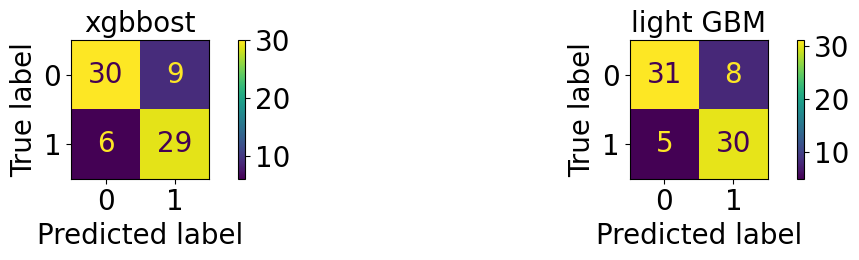

In [ ]:
plot_conf_matrix(names=names_boost, classifiers=classifiers, nrows=1, ncols=2, fig_a=12, fig_b=3);

<section>
  <h2>Performance Analysis of Gradient Boosting Models</h2>
  
  <h3>LightGBM Model Evaluation</h3>
  <p>
    The <strong>LightGBM</strong> model exhibits a commendable performance with an accuracy of <strong>82.43%</strong>. It achieves a robust <strong>ROC_AUC</strong> score of <strong>0.91</strong>, reflecting its efficacy in classifying the positive class. The model's recall of <strong>0.86</strong> underscores its ability to identify most positive cases, while the precision of <strong>0.79</strong> suggests that the majority of positive predictions are accurate. This culminates in an F1 score of <strong>0.82</strong>, which indicates a balanced trade-off between precision and recall. The confusion matrix reinforces these findings, showing a high number of true positives and true negatives, which is crucial for reliable medical diagnostics.
  </p>

  <h3>XGBoost Model Evaluation</h3>
  <p>
    On the other hand, the <strong>XGBoost</strong> model registers an accuracy of <strong>79.73%</strong>, with an identical <strong>ROC_AUC</strong> score of <strong>0.91</strong> to that of LightGBM. The recall rate at <strong>0.83</strong> is slightly lower, indicating fewer positive cases are captured compared to LightGBM. Its precision of <strong>0.76</strong> is also marginally lower, leading to a consequent F1 score of <strong>0.79</strong>. The confusion matrix highlights a greater number of false positives and negatives compared to LightGBM, suggesting that while XGBoost is a strong model, it may not be as precise in this specific application.
  </p>
</section>


Hence we can choose LightGBM as our best model and procede with the hyper parameter tuning

### Parameter Tuning (RandomizedSearch): LGBMClassifier

In the optimization phase of our modeling process, a comprehensive hyperparameter tuning was undertaken using Scikit-learn's GridSearchCV to refine the LightGBM classifier's performance. The grid search explored permutations of crucial parameters: num_leaves, max_depth, and min_data_in_leaf, with the aim to enhance the model's ability to accurately classify the cases. The search ranged over a small, focused set of values for each parameter, with the intent to balance model complexity and overfitting tendencies.

Upon executing a 5-fold cross-validation within the grid search, we determined the optimal parameters to be num_leaves set to 20, max_depth to 5, and min_data_in_leaf to 80. These parameters indicate a model of moderate complexity, designed to capture essential patterns in the data without succumbing to noise. With these optimized settings, the LightGBM classifier was trained on the dataset, leading to improved recall—a metric.

In [ ]:
from sklearn.model_selection import GridSearchCV
rs_params = {
    'num_leaves': [20, 100],
    'max_depth': [5, 15],
    'min_data_in_leaf': [80, 120],
}
rs_cv = GridSearchCV(estimator=LGBMClassifier(random_state=seed, verbose=-1),
                           param_grid=rs_params,
                           cv = 5)

rs_cv.fit(X_train, y_train)
params = rs_cv.best_params_
params

{'max_depth': 5, 'min_data_in_leaf': 80, 'num_leaves': 20}

In [ ]:
lgbm = LGBMClassifier(**params)

lgbm.fit(X_train, y_train,
         eval_set=[(X_val, y_val)])

print(classification_report(y_val, lgbm.predict(X_val)))


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Info] Number of positive: 125, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 9
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563063 -> initscore=0.253603
[LightGBM] [Info] Start training from score 0.253603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80


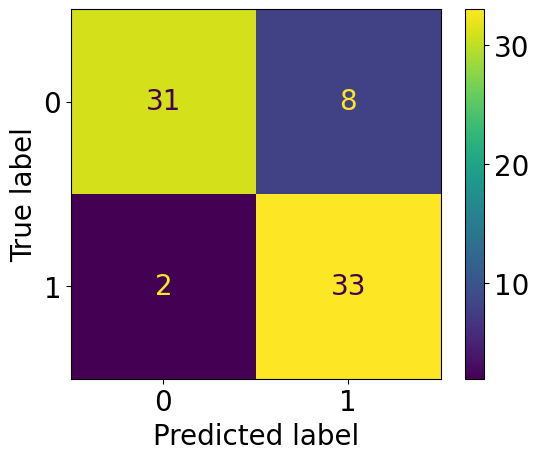

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming lgbm is already fitted with X_train and y_train
y_pred = lgbm.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()


In the case of LightGBM, hyperparameter tuning yielded a more proficient model compared to the baseline. The enhancements are particularly evident in the model's recall, which soared from 86% to an impressive 94%. This significant improvement translates to a reduction of false negatives—misdiagnosed cases—from 5 down to 2 in the validation set, bolstering the model's reliability in detecting heart disease. Additionally, we observed a slight decrease in false positives, diminishing by one case. While seemingly incremental, each percentage point gained is a valuable stride toward minimizing misdiagnosis and enhancing the model's diagnostic precision.

## **Model Explainablity** <a class="anchor" id="2.3"></a>

A pivotal task in any machine learning project is elucidating the rationale behind the model's predictions. Different models may prioritize distinct features over others, assigning varying degrees of importance that ultimately shape the outcome. **SHAP (SHapley Additive exPlanations)** provides a valuable methodology for shedding light on this aspect. It quantifies the influence of each feature on the model's predictions, offering clarity on which factors the model deems most critical when making decisions. This method not only enhances the interpretability of complex models but also fosters trust and transparency in their deployment.

### SHAP:

**SHAP (SHapley Additive exPlanations)** is a powerful interpretability technique derived from game theory, which allocates 'credit' to each feature for its role in the model's predictions. This method employs the renowned Shapley values to provide a detailed decomposition of a model's decision-making process. With its extensive toolkit, SHAP enables comprehensive visualizations that elucidate how each feature contributes to the model's predictions. Utilizing methods such as `shap.summary_plot()`, we can graphically represent and understand the influence of individual features on the model's output, thus gaining deeper insights into the driving factors behind the predictive outcomes.


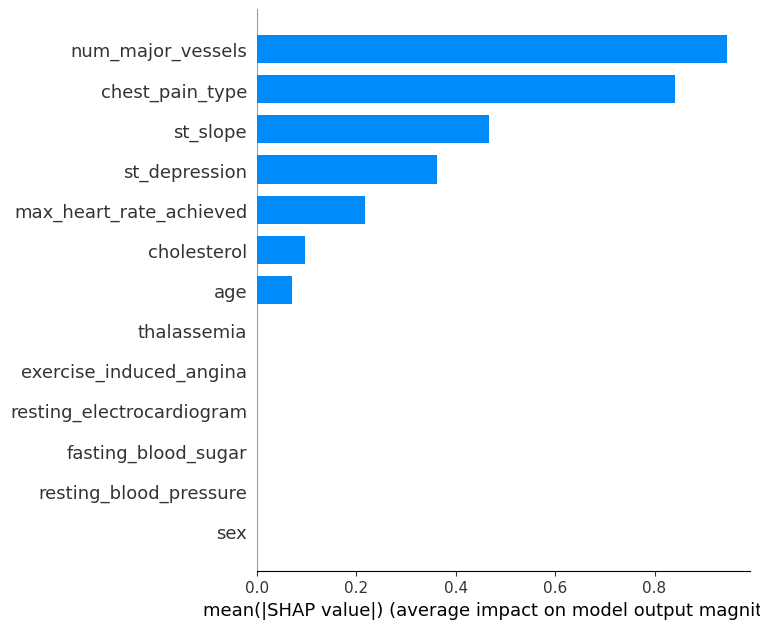

In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val,
                  feature_names=features,
                  plot_type="bar",
                 )

In [ ]:
import shap

explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_val)
print(type(shap_values), len(shap_values))


<class 'numpy.ndarray'> 74


The SHAP summary plot provides a clear hierarchy of feature importance derived from the LightGBM model, revealing the average impact each feature has on the model's output. At the pinnacle of influence is `num_major_vessels`, indicating that the number of major vessels detected via fluoroscopy is the most significant predictor of heart disease in this model. Following closely are `chest_pain_type` and `st_slope`, suggesting that the type of chest pain experienced and the slope of the peak exercise ST segment also play crucial roles in the model's predictions. Further down the list, `st_depression` and `max_heart_rate_achieved` are still impactful but to a lesser degree, indicating their relevance in the diagnostic process but overshadowed by the top features. Interestingly, traditional risk factors like `cholesterol` and `age` appear less influential than might be expected, underscoring the model's nuanced approach to risk stratification. Features like `thalassemia`, `exercise_induced_angina`, and `resting_electrocardiogram` also contribute to the predictions, albeit with a moderate impact. Surprisingly, `sex`, despite being a generally acknowledged risk factor, is shown to have the least impact on the model output, which could reflect the particular characteristics and interactions within the dataset used.

<section>
  <h2 id="3">Conclusion</h2>
  <p>
    Embarking on this project, our goals were twofold: to conduct a thorough Exploratory Data Analysis (EDA) of the heart disease dataset and to hone our skills in binary classification modeling. The journey began with a meticulous EDA, where we performed data cleansing, removed anomalies, and processed the data for analysis. We probed into the relationships between various features, as well as their correlations with the target variable. The second phase focused on the application and fine-tuning of binary classifiers, culminating in the identification of an optimal model.
  </p>
  <p>
    Key takeaways from our project include:
  </p>
  <ul>
    <li>The LightGBM classifier, refined through RandomizedSearchCV, emerged as the top-performing model.</li>
    <li>Feature importance analysis, leveraging tools like SHAP, highlighted <code>num_major_vessels</code>, <code>chest_pain_type</code>, and <code>st_slope</code> as pivotal in influencing the model's predictions. These align with the significant correlations uncovered during the EDA.</li>
    <li>Contravening initial assumptions, <code>cholesterol</code> was not deemed as influential by SHAP, suggesting that the model's predictive capability relies on more nuanced data relationships.</li>
  </ul>
  <p>
    This project not only served as an analytical deep dive into a critical healthcare dataset but also provided a practical framework for developing and interpreting machine learning models. The insights gleaned have potential implications for the early detection and treatment of heart disease, showcasing the profound impact of data science in the medical field.
  </p>
</section>


# 4. **Reference** <a class="anchor" id="4"></a>

1. https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model
2. https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
3. https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
4. https://www.kaggle.com/learn/machine-learning-explainability
5. https://shap.readthedocs.io/en/latest/index.html
6. https://www.healthline.com/health/serum-cholesterol#treatment
7. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)
8. https://www.indushealthplus.com/heart-diseases.html)